In [1]:
import vk
import requests
import time
import json
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML
from PIL import Image
from io import BytesIO
from matplotlib.pyplot import imshowy

### Defining an API that simplifies access to core functions. (Access, Friends, Name, Photo)

In [3]:
class WebService:
    
    def __init__(self):
        self.token = '2e8afce6f0f7ace2cc77737187540e29b857c40379f25f6711ee9b315ff687d383d3a8a3db3b378498cab'
        self.session = vk.Session(access_token=self.token)
        self.api = vk.API(self.session, v='5.101')
        
    def get_friends(self, id_: int, count=None) -> [int]:
        friends = self.api.friends.get(user_id=id_, count=count)
        return friends['items']
    
    def get_user_name(self, id_: int) -> str:
        user = self.api.users.get(user_id=id_)
        return user
    
    def get_user_photo(self, id_: int) -> str:
        photo = self.api.users.get(user_id=id_,fields='photo_100')
        return photo[0]
    
    def show_user_photo(self, id_: int) -> Image:
        response = self.get_user_photo(id_)
        return Image(url= response['photo_100'], width=100, height=100)

In [2]:
IDS = (
    559640345,  # - кирилл
    29759351,  # - Павел
    120435774,  # - Алена
    78517271,  # - Олег
    55564167,  # - Артем
    202514864,  # - Артем
    79818398,  # - Никита
    18214699,  # - Раиль
    322913600,  # - Иван
    32418429,  # - Игнат
    32784038,  # - Глеб
    55355150,  # - Роман
    65817487,  # - Алекс
    76637395,  # - Роман
    31710423,  # - Василий
    557916962,  # - Максим
    44907648  # - Миланочка
)

COUNT = 30
DEEP = 3

In [3]:
graph = nx.Graph()
ws = WebService()

In [4]:
users = list(IDS)
edges = []


for id_ in IDS:
    try:
        # get friends for current id
        friends = ws.get_friends(id_, count=COUNT) 
        users.extend(friends)
        edges.extend([(id_, fr) for fr in friends])
        # Becouse of the limit on the number of requests, you must simulate a program stop
        time.sleep(12)
    # check if user has private profile     
    except vk.api.VkAPIError as err:
        print(err)

30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '31710423', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '557916962', 'count': '30'}


In [5]:
k = 1
new_users = list(filter(lambda x: x not in IDS, users))

while k <= DEEP:
    temp = []
    print(f'Iteration: {k}')
    
    for user in new_users:
        try:
            friend = ws.get_friends(user, count=COUNT)
            users.extend(friends)
            temp.extend(friends)
            edges.extend([(id_, fr) for fr in friend])
            
            time.sleep(12)
        except vk.api.VkAPIError as err:
            print(err)
            
    new_users = list(filter(lambda x: x not in users, temp))
    users.extend(new_users)
    k += 1

Iteration: 1
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '9883526', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '14209118', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '25701289', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '35637086', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '2871924', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '17512545', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '23185438', 'count': '30'}
30. This profile is pri

### Due to the long processing of requests to VK, we need save the received data in json

In [17]:
with open('new_ids', 'w') as f:
    json.dump(users, f)
    
with open('new_edges', 'w') as f:
    json.dump(edges, f)

### Adding the resulting nodes and edges to the graph.

In [7]:
graph.add_nodes_from(users)
graph.add_edges_from(edges)

### Check the validity of the received data and ignore users that have lock profile

In [8]:
paths = []
for i, v in enumerate(IDS):
    if v != IDS[-1]:
        for j in range(1, len(IDS) - i - 1):
            try:
                path = nx.shortest_path(graph, IDS[i], IDS[i + j])
                paths.extend(path)
            except nx.NodeNotFound as err:
                print(err)
            except nx.NetworkXNoPath as err:
                print(err)

No path between 559640345 and 557916962.
No path between 29759351 and 557916962.
No path between 120435774 and 557916962.
No path between 78517271 and 557916962.
No path between 55564167 and 557916962.
No path between 202514864 and 557916962.
No path between 79818398 and 557916962.
No path between 18214699 and 557916962.
No path between 322913600 and 557916962.
No path between 32418429 and 557916962.
No path between 32784038 and 557916962.
No path between 55355150 and 557916962.
No path between 65817487 and 557916962.
No path between 76637395 and 557916962.
No path between 31710423 and 557916962.


In [9]:
nodes_to_delete = list(filter(lambda x: x not in set(paths), users))

#### Removing invalid data

In [11]:
graph.remove_nodes_from(nodes_to_delete)

In [ ]:
### Draw graph using netrworkx function

plt.figure()
plt.axis('off')
fig = plt.figure(figsize=(20,20))

pos=nx.spring_layout(graph)
d = nx.degree(graph)
nx.draw_networkx_edges(graph, pos, alpha=0.4, edge_color='gray')

plt.savefig("path.png")
plt.show()

### Using the API we defined above, print information about the user who has the most popular profile

In [13]:
central_cont = nx.betweenness_centrality(graph)
central_id = max(central_cont, key=central_cont.get)
ws_central = ws.get_user_name(central_id)[0]
ws_central_name = ws_central['first_name'] + ' ' + ws_central['last_name']
print(f'id: {central_id}, Значение: {central_cont[central_id]}, Имя: {ws_central_name}')

id: 44907648, Значение: 0.9999978599583134, Имя: Мила Воротникова


In [14]:
url = ws.get_user_photo(central_id)['photo_100']

In [15]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))

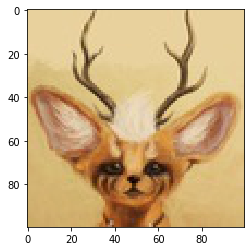

In [16]:
imshow(img)